In [1]:
pip install pandas textblob matplotlib nltk

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv("reviews.csv")

# Show the first few rows
df.head()

,Text
0,I love this phone! It's amazing.
1,This product is terrible. Waste of money.
2,"Absolutely fantastic, works like a charm."
3,"Not what I expected, pretty disappointing."
4,"Just okay, nothing special."


In [5]:
# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [6]:
# Apply the function to each row
df['Sentiment'] = df['Text'].apply(get_sentiment)

# Show the updated dataframe
df

,Text,Sentiment
0,I love this phone! It's amazing.,Positive
1,This product is terrible. Waste of money.,Negative
2,"Absolutely fantastic, works like a charm.",Positive
3,"Not what I expected, pretty disappointing.",Negative
4,"Just okay, nothing special.",Positive
5,Best purchase ever! Highly recommend it.,Positive
6,"Do not buy this, it stopped working in a week.",Neutral
7,Satisfied with the performance.,Positive
8,Could be better. It's average.,Positive
9,Horrible experience. Never again!,Negative


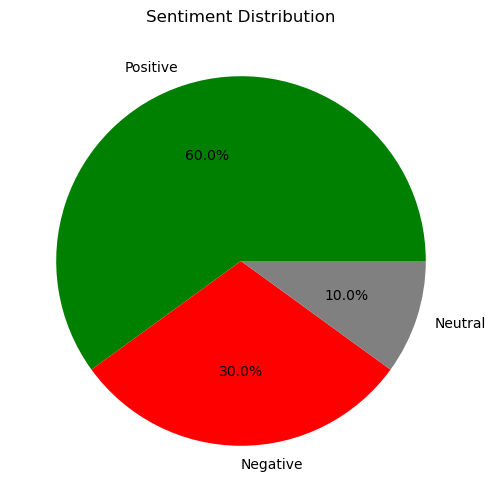

In [7]:
# Count sentiment types
sentiment_counts = df['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.show()

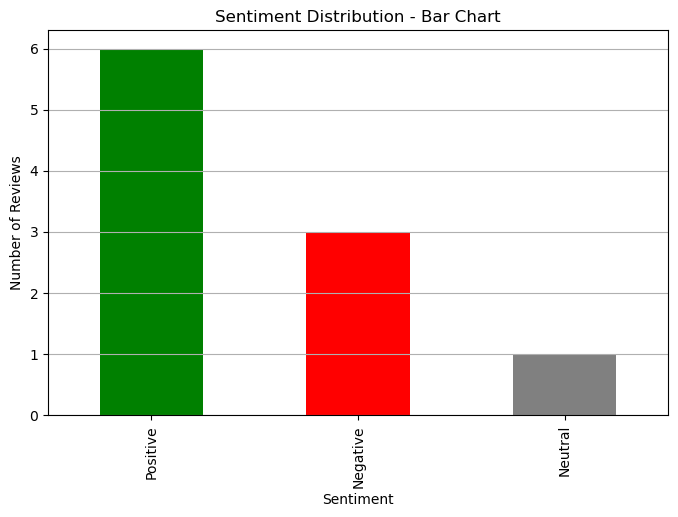

In [8]:
# Bar chart of sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8,5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution - Bar Chart")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.grid(axis='y')
plt.show()

In [9]:
!pip install wordcloud

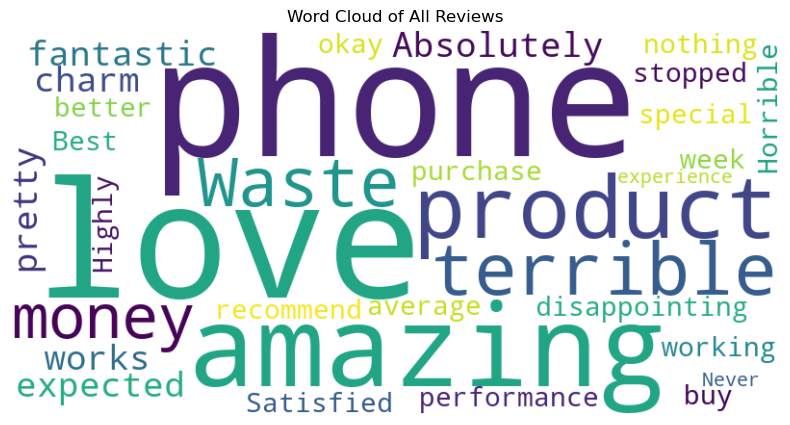

In [10]:
from wordcloud import WordCloud

# Combine all review texts into one string
all_text = " ".join(df['Text'])

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of All Reviews")
plt.show()